In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import re

###  V: wind speed; 
### D: wind direction; 
### rho: air density; 
### H: humidity; 
### I: turbulence intensity; 
### S: vertical wind shear; 
### Sa: above-hub height wind shear,
### Sb: below-hub height wind shear.

In [3]:
csv_files = glob.glob('Data/*csv')
csv_files = sorted(csv_files)
csv_files

['Data\\Inland Wind Farm Dataset2(WT1).csv',
 'Data\\Inland Wind Farm Dataset2(WT2).csv',
 'Data\\Offshore Wind Farm Dataset2(WT3).csv',
 'Data\\Offshore Wind Farm Dataset2(WT4).csv']

In [4]:
merged = glob.glob("merged.csv")
if not merged:
    frames = []
    
    for file in csv_files:
        df = pd.read_csv(file)
        df['WT'] = int(re.findall("\d+",file)[-1])
        frames.append(df)
    df_merged = pd.concat(frames, axis=0)
    df_merged.drop("H", axis = 1, inplace=True) # no idea why this gets added
    df_merged.to_csv('merged.csv', index=False)
else:
    df_merged = pd.read_csv("merged.csv")
df_merged['time'] = pd.to_datetime(df_merged['time'])
df_merged["WT"] = df_merged["WT"].astype("category")

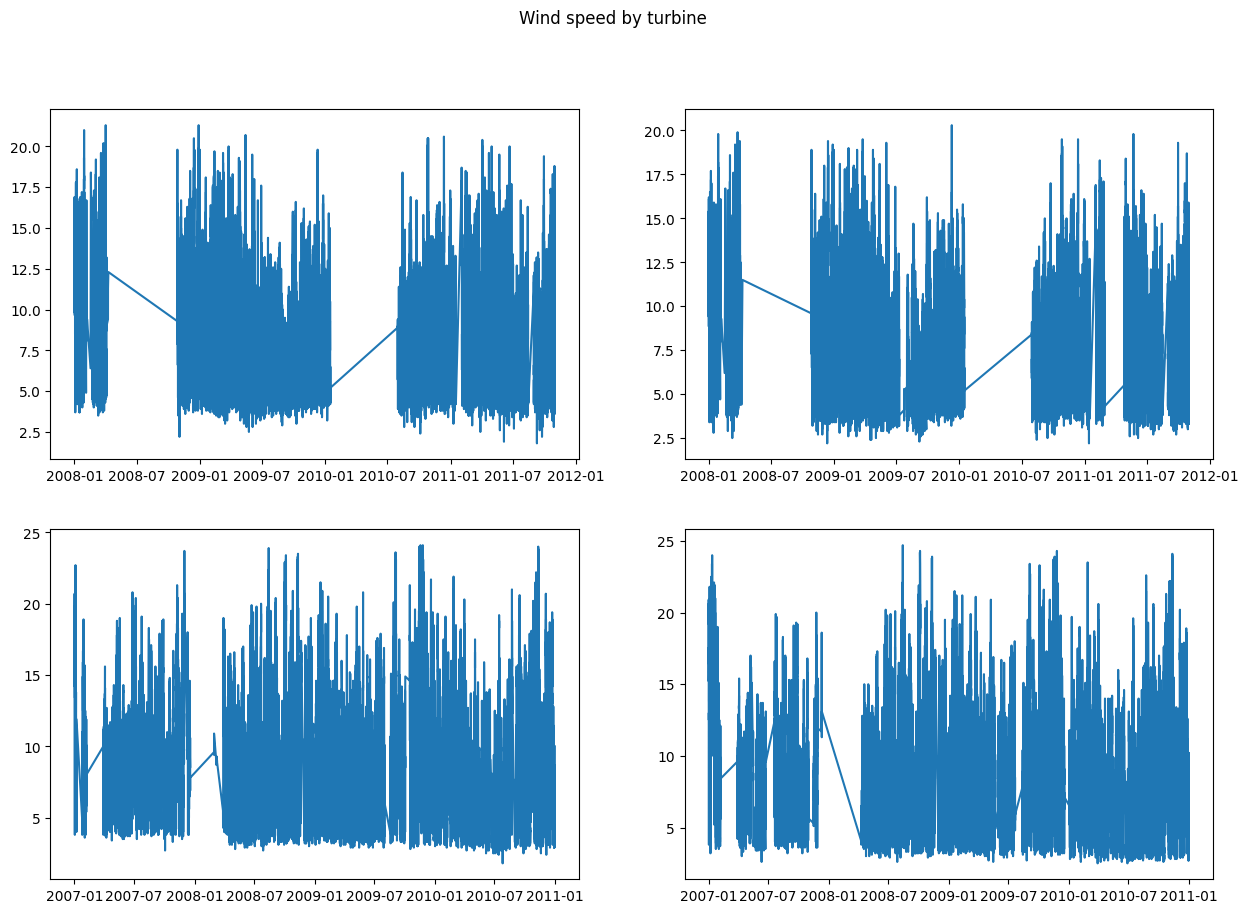

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (15,10))
axes = axes.flatten()
fig.suptitle("Wind speed by turbine")
for i in range(1,5):
    axes[i-1].plot(df_merged.time.loc[df_merged.WT == i], df_merged.V.loc[df_merged.WT == i])
plt.show()

In [6]:
df_merged.loc[df_merged.WT == 1].head()

,time,V,Vadj,D,rho,I,S,normPW,WT
0,2008-01-01 00:00:00,9.7,9.695124,217.9,1.239312,0.097938,0.283731,59.775758,1
1,2008-01-01 00:10:00,10.6,10.595612,210.1,1.239642,0.103774,0.252274,73.569697,1
2,2008-01-01 00:20:00,11.8,11.797270,206.2,1.240322,0.083898,0.175058,95.460606,1
3,2008-01-01 00:30:00,11.5,11.499414,205.6,1.240993,0.121739,0.208260,90.933333,1
4,2008-01-01 00:40:00,11.2,11.199954,207.8,1.241168,0.089286,0.200987,80.872727,1


In [7]:
df_merged.shape

(410498, 9)

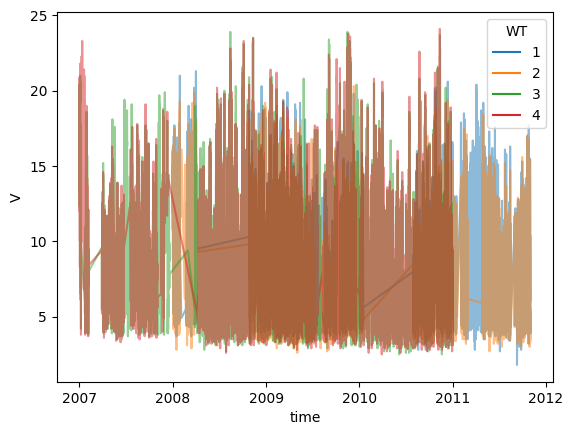

In [8]:
REDUCE_COEF = 4
sns.lineplot(x="time", y='V', hue="WT", data=df_merged.sample(df_merged.shape[0]//REDUCE_COEF), alpha = 0.5)
plt.show()